In [2]:
import torch
import matplotlib.pyplot as plt
#import cartopy.crs as ccrs
import numpy as np
import time
import rasterio

# Load saved predictions
predicts = torch.load("../lightning_logs/predictions_1.pt")
print(type(predicts))
print(predicts.shape)

<class 'torch.Tensor'>
torch.Size([3, 4091, 128, 128])


In [22]:
sample = predicts[:, 0, :, :]
# OG .tif input & reads metadata
with rasterio.open("../WildfireSpreadTS/2018/fire_21458798/2018-01-13.tif") as src:
    meta = src.meta.copy()

In [23]:
# Ensure right num of bands & data type
meta.update({
    "count": sample.shape[0],
    "dtype": sample.numpy().dtype,
})

In [24]:
# Save prediction as .tif
with rasterio.open("prediction_sample0.tif", "w", **meta) as dst:
    dst.write(sample.numpy())

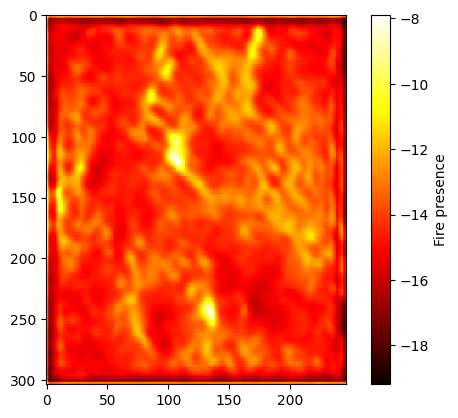

In [32]:
# 2 is prediction of fire spread
with rasterio.open("prediction_sample0.tif") as src:
    img = src.read(2)
plt.imshow(img, cmap="hot")
plt.colorbar(label="Fire presence")
plt.show()

In [40]:
with rasterio.open("prediction_sample0.tif") as src:
    for b in range(1, src.count+1):
        print(b, src.descriptions[b-1])

1 None
2 None
3 None


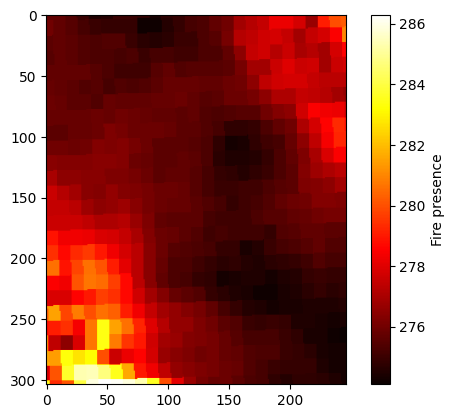

In [37]:
with rasterio.open("../WildfireSpreadTS/2018/fire_21458798/2018-01-01.tif") as src:
    img = src.read(9)
plt.imshow(img, cmap="hot")
plt.colorbar(label="Fire presence")
plt.show()

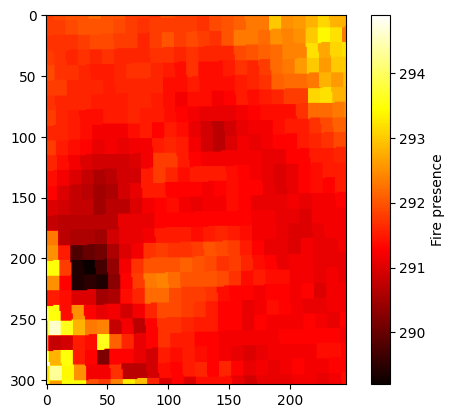

In [38]:
with rasterio.open("../WildfireSpreadTS/2018/fire_21458798/2018-01-01.tif") as src:
    img = src.read(10)
plt.imshow(img, cmap="hot")
plt.colorbar(label="Fire presence")
plt.show()

In [39]:
with rasterio.open("../WildfireSpreadTS/2018/fire_21458798/2018-01-01.tif") as src:
    for b in range(1, src.count+1):
        print(b, src.descriptions[b-1])

1 M11
2 I2
3 I1
4 NDVI_last
5 EVI2_last
6 total precipitation
7 wind speed
8 wind direction
9 minimum temperature
10 maximum temperature
11 energy release component
12 specific humidity
13 slope
14 aspect
15 elevation
16 pdsi
17 LC_Type1
18 total_precipitation_surface_sum
19 forecast wind speed
20 forecast wind direction
21 forecast temperature
22 forecast specific humidity
23 active fire


In [47]:







# Below is work for 2019 prediction, visuals








In [3]:
# This is predictions for 2019



# Load saved predictions for 2019
predicts = torch.load("../lightning_logs/predictions_2.pt")
print(type(predicts))
print(predicts.shape)

<class 'torch.Tensor'>
torch.Size([3, 1351, 128, 128])


In [4]:
sample = predicts[:, 0, :, :]
# OG .tif input & reads metadata
with rasterio.open("../WildfireSpreadTS/2019/fire_22710141/2019-03-07.tif") as src:
    meta = src.meta.copy()

In [5]:
# Ensure right num of bands & data type
meta.update({
    "count": sample.shape[0],
    "dtype": sample.numpy().dtype,
})

In [6]:
# Save prediction as .tif
with rasterio.open("prediction_sample1.tif", "w", **meta) as dst:
    dst.write(sample.numpy())

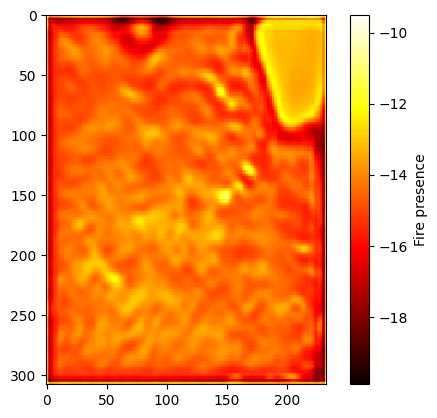

In [7]:
# 2 is prediction of fire spread
with rasterio.open("prediction_sample1.tif") as src:
    img = src.read(2)
plt.imshow(img, cmap="hot")
plt.colorbar(label="Fire presence")
plt.show()

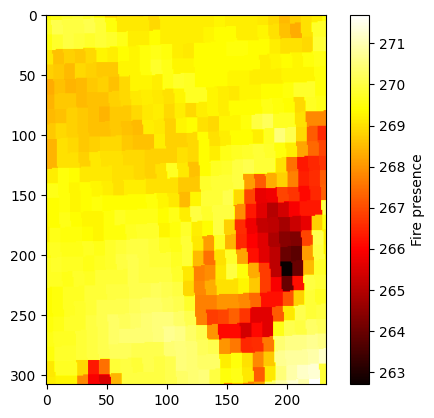

In [11]:
with rasterio.open("../WildfireSpreadTS/2019/fire_22710141/2019-03-07.tif") as src:
    img = src.read(9)
plt.imshow(img, cmap="hot")
plt.colorbar(label="Fire presence")
plt.show()

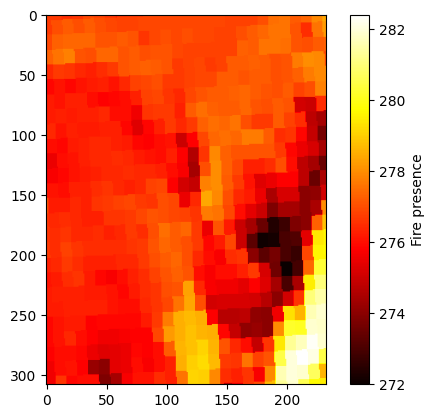

In [12]:
with rasterio.open("../WildfireSpreadTS/2019/fire_22710141/2019-03-07.tif") as src:
        img = src.read(10)
plt.imshow(img, cmap="hot")
plt.colorbar(label="Fire presence")
plt.show()

In [13]:
# 2 is prediction of fire spread
with rasterio.open("prediction_sample1.tif") as src:
    print("CRS:", src.crs)
    print("Resolution:", src.res)
    print("Bounds:", src.bounds)
    print("Shape:", src.shape)
    arr = src.read(2)
    print("Sample values:", arr[0:5, 0:5])
    

CRS: EPSG:32610
Resolution: (375.0, 375.0)
Bounds: BoundingBox(left=785625.0, bottom=4695375.0, right=873000.0, top=4810875.0)
Shape: (308, 233)
Sample values: [[ -9.849671  -9.849671 -14.017676 -14.017676 -13.751201]
 [ -9.849671  -9.849671 -14.017676 -14.017676 -13.751201]
 [ -9.849671  -9.849671 -14.017676 -14.017676 -13.751201]
 [-13.091707 -13.091707 -18.075851 -18.075851 -17.949438]
 [-13.091707 -13.091707 -18.075851 -18.075851 -17.949438]]


In [14]:
# 2 is prediction of fire spread
with rasterio.open("../WildfireSpreadTS/2019/fire_22710141/2019-03-07.tif") as src:
    print("CRS:", src.crs)
    print("Resolution:", src.res)
    print("Bounds:", src.bounds)
    print("Shape:", src.shape)
    arr = src.read(2)
    print("Sample values:", arr[0:5, 0:5])
    

CRS: EPSG:32610
Resolution: (375.0, 375.0)
Bounds: BoundingBox(left=785625.0, bottom=4695375.0, right=873000.0, top=4810875.0)
Shape: (308, 233)
Sample values: [[ 494.  494.  975. 1255. 1278.]
 [1056. 1111. 1184. 1298. 1298.]
 [ 827. 1056. 1111. 1414. 1347.]
 [2607. 1682. 1682. 1420. 1414.]
 [2229. 2025. 2025. 1580. 1278.]]


/tmp/ipykernel_19382/1448745885.py:39: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


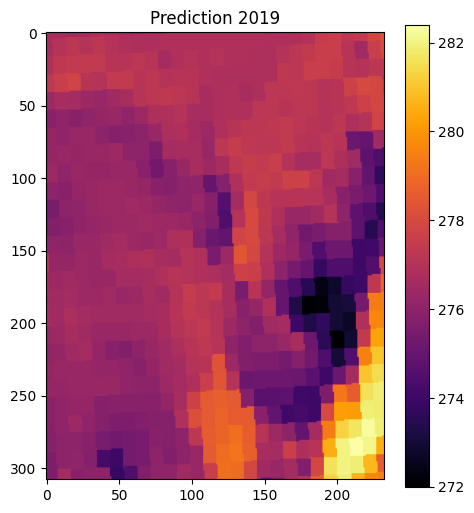

In [24]:
# Reproject prediction to match original from dataset

from rasterio.warp import calculate_default_transform, reproject, Resampling


with rasterio.open("prediction_sample1.tif") as src:
    transform, width, height = calculate_default_transform(
        src.crs, "EPSG:32610", src.width, src.height, *src.bounds
    )
    kwargs = src.meta.copy()
    kwargs.update({
        "crs": "EPSG:32610",
        "transform": transform,
        "width": width,
        "height": height
    })

    with rasterio.open("prediction_sample1_aligned.tif", "w", **kwargs) as dst:
        for i in range(1, src.count+1):
            reproject(
                source=rasterio.band(src, i),
                destination=rasterio.band(dst, i),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=transform,
                dst_crs="EPSG:32610",
                resampling=Resampling.nearest
            )

with rasterio.open("../WildfireSpreadTS/2019/fire_22710141/2019-03-07.tif") as orig, rasterio.open("prediction_sample1_aligned.tif") as pred:
    orig_arr = orig.read(10)
    pred_arr = pred.read(2)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(orig_arr, cmap="viridis")
plt.colorbar()

plt.subplot(1,2,1)
plt.title("Prediction 2019")
plt.imshow(orig_arr, cmap="inferno")
plt.colorbar()

In [27]:
# Input into google earth engine to see on map 2019
"""
var original = ee.Image("projects/wildfire-spread-visualizer/assets/original_2019");
var prediction = ee.Image("projects/wildfire-spread-visualizer/assets/prediction_2019");
Map.centerObject(original);
var o_band_low = original.select(8)
var o_band_high = original.select(9)
var p_band = prediction.select(1)
Map.addLayer(o_band_low, {min:263, max:271, palette:['blue', 'green']}, "Lowest");
Map.addLayer(o_band_high, {min:272, max:278, palette:['yellow', 'gray']}, "Highest");
Map.addLayer(p_band, {min:-18, max:-10, palette:['red', 'yellow']}, "Prediction");
var diff = p_band.subtract(o_band_high);
Map.addLayer(diff, {min:-296, max:-288, palette:['purple', 'orange', 'white']}, "Diff");
"""

'\nvar original = ee.Image("projects/wildfire-spread-visualizer/assets/original_2019");\nvar prediction = ee.Image("projects/wildfire-spread-visualizer/assets/prediction_2019");\nMap.centerObject(original);\nvar o_band_low = original.select(8)\nvar o_band_high = original.select(9)\nvar p_band = prediction.select(1)\nMap.addLayer(o_band_low, {min:263, max:271, palette:[\'blue\', \'green\']}, "Lowest");\nMap.addLayer(o_band_high, {min:272, max:278, palette:[\'yellow\', \'gray\']}, "Highest");\nMap.addLayer(p_band, {min:-18, max:-10, palette:[\'red\', \'yellow\']}, "Prediction");\nvar diff = p_band.subtract(o_band_high);\nMap.addLayer(diff, {min:-296, max:-288, palette:[\'purple\', \'orange\', \'white\']}, "Diff");\n'

In [28]:







# Below is work for 2025 prediction, visuals








'\nvar original = ee.Image("projects/wildfire-spread-visualizer/assets/original_2025");\nvar prediction = ee.Image("projects/wildfire-spread-visualizer/assets/original_2025");\nMap.centerObject(original);\nvar o_band_low = original.select(8)\nvar o_band_high = original.select(9)\nvar p_band = prediction.select(1)\nMap.addLayer(o_band_low, {min:278, max:294, palette:[\'blue\', \'green\']}, "Lowest");\nMap.addLayer(o_band_high, {min:292, max:308, palette:[\'yellow\', \'gray\']}, "Highest");\nMap.addLayer(p_band, {min:-18, max:-10, palette:[\'red\', \'yellow\']}, "Prediction");\nvar diff = p_band.subtract(o_band_high);\nMap.addLayer(diff, {min:-296, max:-288, palette:[\'purple\', \'orange\', \'white\']}, "Diff");\n\n'

In [31]:
predicts = torch.load("../lightning_logs/predictions_1.pt")
print(type(predicts))
print(predicts.shape)

sample = predicts[:, 0, :, :]
# OG .tif input & reads metadata
with rasterio.open("Fixed_Prediction_2025.tiff") as src:
    meta = src.meta.copy()

<class 'torch.Tensor'>
torch.Size([3, 4091, 128, 128])


In [33]:
# Ensure right num of bands & data type
meta.update({
    "count": sample.shape[0],
    "dtype": sample.numpy().dtype,
})

# Save prediction as .tif
with rasterio.open("prediction_sample2.tif", "w", **meta) as dst:
    dst.write(sample.numpy())

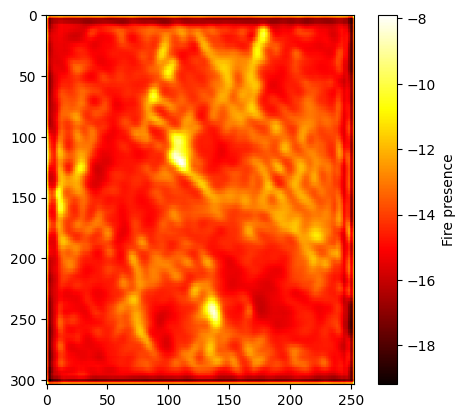

In [34]:
# 2 is prediction of fire spread
with rasterio.open("prediction_sample2.tif") as src:
    img = src.read(2)
plt.imshow(img, cmap="hot")
plt.colorbar(label="Fire presence")
plt.show()

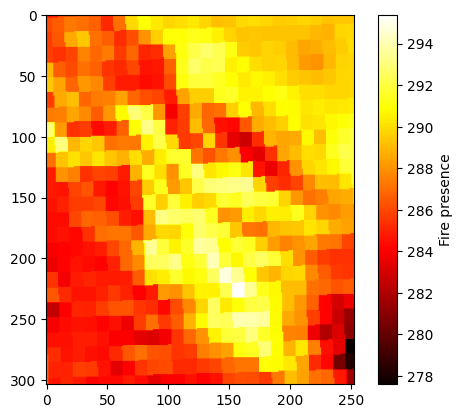

In [39]:
with rasterio.open("Fixed_Prediction_2025.tiff") as src:
    img = src.read(9)
plt.imshow(img, cmap="hot")
plt.colorbar(label="Fire presence")
plt.show()

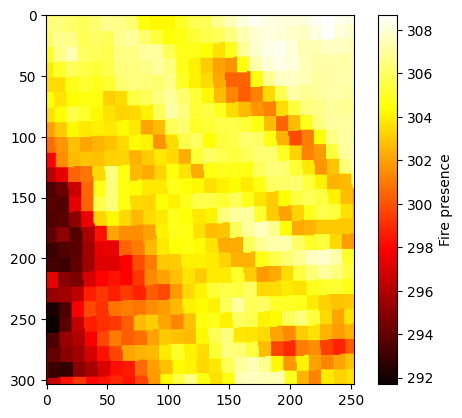

In [40]:
with rasterio.open("Fixed_Prediction_2025.tiff") as src:
    img = src.read(10)
plt.imshow(img, cmap="hot")
plt.colorbar(label="Fire presence")
plt.show()

In [41]:
# 2 is prediction of fire spread
with rasterio.open("prediction_sample2.tif") as src:
    print("CRS:", src.crs)
    print("Resolution:", src.res)
    print("Bounds:", src.bounds)
    print("Shape:", src.shape)
    arr = src.read(2)
    print("Sample values:", arr[0:5, 0:5])
    

CRS: EPSG:32610
Resolution: (375.0, 375.0)
Bounds: BoundingBox(left=717375.0, bottom=3832500.0, right=812250.0, top=3946500.0)
Shape: (304, 253)
Sample values: [[ -9.257463  -9.257463 -13.123173 -13.123173 -12.63302 ]
 [ -9.257463  -9.257463 -13.123173 -13.123173 -12.63302 ]
 [ -9.257463  -9.257463 -13.123173 -13.123173 -12.63302 ]
 [-12.598081 -12.598081 -17.384644 -17.384644 -16.83232 ]
 [-12.598081 -12.598081 -17.384644 -17.384644 -16.83232 ]]


/tmp/ipykernel_19382/1708269104.py:39: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


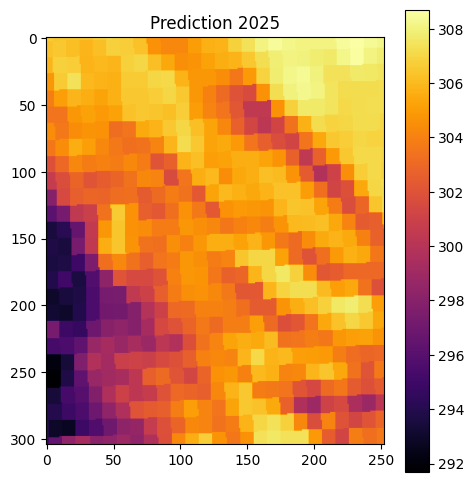

In [44]:
# Reproject prediction to match original from dataset

from rasterio.warp import calculate_default_transform, reproject, Resampling


with rasterio.open("prediction_sample2.tif") as src:
    transform, width, height = calculate_default_transform(
        src.crs, "EPSG:32610", src.width, src.height, *src.bounds
    )
    kwargs = src.meta.copy()
    kwargs.update({
        "crs": "EPSG:32610",
        "transform": transform,
        "width": width,
        "height": height
    })

    with rasterio.open("prediction_sample2_aligned.tif", "w", **kwargs) as dst:
        for i in range(1, src.count+1):
            reproject(
                source=rasterio.band(src, i),
                destination=rasterio.band(dst, i),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=transform,
                dst_crs="EPSG:32610",
                resampling=Resampling.nearest
            )

with rasterio.open("Fixed_Prediction_2025.tiff") as orig, rasterio.open("prediction_sample2_aligned.tif") as pred:
    orig_arr = orig.read(10)
    pred_arr = pred.read(2)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Original 2025")
plt.imshow(orig_arr, cmap="viridis")
plt.colorbar()

plt.subplot(1,2,1)
plt.title("Prediction 2025")
plt.imshow(orig_arr, cmap="inferno")
plt.colorbar()

In [45]:
# Input into google earth engine to see on map 2025
"""
var original = ee.Image("projects/wildfire-spread-visualizer/assets/original_2025");
var prediction = ee.Image("projects/wildfire-spread-visualizer/assets/prediction_sample2");
Map.centerObject(original);
var o_band_low = original.select(8)
var o_band_high = original.select(9)
var p_band = prediction.select(1)
Map.addLayer(o_band_low, {min:278, max:294, palette:['blue', 'green']}, "Lowest");
Map.addLayer(o_band_high, {min:292, max:308, palette:['yellow', 'gray']}, "Highest");
Map.addLayer(p_band, {min:-18, max:-10, palette:['red', 'yellow']}, "Prediction");
var diff = p_band.subtract(o_band_high);
Map.addLayer(diff, {min:-326, max:-302, palette:['purple', 'orange', 'white']}, "Diff");
"""

'\nvar original = ee.Image("projects/wildfire-spread-visualizer/assets/original_2025");\nvar prediction = ee.Image("projects/wildfire-spread-visualizer/assets/prediction_sample2");\nMap.centerObject(original);\nvar o_band_low = original.select(8)\nvar o_band_high = original.select(9)\nvar p_band = prediction.select(1)\nMap.addLayer(o_band_low, {min:278, max:294, palette:[\'blue\', \'green\']}, "Lowest");\nMap.addLayer(o_band_high, {min:292, max:308, palette:[\'yellow\', \'gray\']}, "Highest");\nMap.addLayer(p_band, {min:-18, max:-10, palette:[\'red\', \'yellow\']}, "Prediction");\nvar diff = p_band.subtract(o_band_high);\nMap.addLayer(diff, {min:-326, max:-302, palette:[\'purple\', \'orange\', \'white\']}, "Diff");\n'